<a href="https://colab.research.google.com/github/SafeiaSherif/GP/blob/main/medical_students_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_sets/medical_students_dataset.csv')

In [ ]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
df.duplicated().sum()

7644

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

We have about 20,000 NaNs in each variable but, if we try to drop the duplicates the dataset will lose more than the 20,000 NaNs.

The upcomming cell shows that the data has become about 44,000 after removing the duplicates. It has lost about 75% from its size.

In [ ]:
df0 = df.copy()
df0 = df0.dropna()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44337 entries, 2 to 199998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      44337 non-null  float64
 1   Age             44337 non-null  float64
 2   Gender          44337 non-null  object 
 3   Height          44337 non-null  float64
 4   Weight          44337 non-null  float64
 5   Blood Type      44337 non-null  object 
 6   BMI             44337 non-null  float64
 7   Temperature     44337 non-null  float64
 8   Heart Rate      44337 non-null  float64
 9   Blood Pressure  44337 non-null  float64
 10  Cholesterol     44337 non-null  float64
 11  Diabetes        44337 non-null  object 
 12  Smoking         44337 non-null  object 
dtypes: float64(9), object(4)
memory usage: 4.7+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192356 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      172465 non-null  float64
 1   Age             172464 non-null  float64
 2   Gender          172432 non-null  object 
 3   Height          172449 non-null  float64
 4   Weight          172455 non-null  float64
 5   Blood Type      172440 non-null  object 
 6   BMI             172456 non-null  float64
 7   Temperature     172445 non-null  float64
 8   Heart Rate      172453 non-null  float64
 9   Blood Pressure  172464 non-null  float64
 10  Cholesterol     172463 non-null  float64
 11  Diabetes        172451 non-null  object 
 12  Smoking         172459 non-null  object 
dtypes: float64(9), object(4)
memory usage: 20.5+ MB


We can fill the missing data with suitable values.

In [ ]:
# Function to fill the numeric variables with their mean value
def numeric_fill(df_x, cols):
  for i in cols:
    print(i)
    df_x[i].fillna(df_x[i].mean(), inplace=True)
  return df_x

In [ ]:
# Function to fill the categorical variables with their mode value
def categorical_fill(df_x, cols):
  for i in cols:
    df_x[i].fillna(df_x[i].mode()[0], inplace=True)
  return df_x

In [ ]:
num_cols = ["Age", "Height", "Weight", "BMI", "Temperature", "Heart Rate", "Blood Pressure", "Cholesterol"]
cat_cols = ["Gender", "Blood Type", "Diabetes", "Smoking"]

In [ ]:
df0 = df.copy()
df1 = numeric_fill(df0, num_cols)
clean_df = categorical_fill(df1, cat_cols)
clean_df.info()

Age
Height
Weight
BMI
Temperature
Heart Rate
Blood Pressure
Cholesterol
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192356 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      172465 non-null  float64
 1   Age             192356 non-null  float64
 2   Gender          192356 non-null  object 
 3   Height          192356 non-null  float64
 4   Weight          192356 non-null  float64
 5   Blood Type      192356 non-null  object 
 6   BMI             192356 non-null  float64
 7   Temperature     192356 non-null  float64
 8   Heart Rate      192356 non-null  float64
 9   Blood Pressure  192356 non-null  float64
 10  Cholesterol     192356 non-null  float64
 11  Diabetes        192356 non-null  object 
 12  Smoking         192356 non-null  object 
dtypes: float64(9), object(4)
memory usage: 20.5+ MB


Now, we have a clean data that can be analysed

In [ ]:
males = clean_df["Gender"].value_counts()["Male"]
females = clean_df["Gender"].value_counts()["Female"]

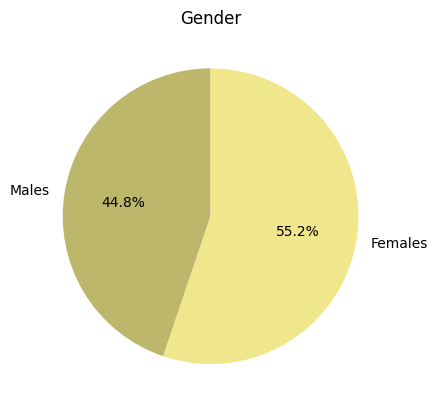

In [ ]:
plt.pie([males, females], labels=["Males", "Females"],
        colors=["darkkhaki", "khaki"],
        startangle=90, autopct='%1.1f%%')
plt.title("Gender")
plt.show()

In [ ]:
clean_df["Blood Type"].unique()

array(['O', 'B', 'A', 'AB'], dtype=object)

In [ ]:
a = clean_df["Blood Type"].value_counts()["A"]
b = clean_df["Blood Type"].value_counts()["B"]
o = clean_df["Blood Type"].value_counts()["O"]
ab = clean_df["Blood Type"].value_counts()["AB"]

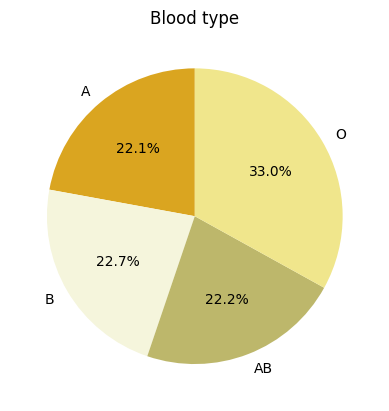

In [ ]:
plt.pie([a, b, ab, o], labels=["A", "B", "AB", "O"],
        colors=["goldenrod", "beige", "darkkhaki", "khaki"],
        startangle=90, autopct='%1.1f%%')
plt.title("Blood type")
plt.show()

In [ ]:
yes = clean_df["Diabetes"].value_counts()["Yes"]
no = clean_df["Diabetes"].value_counts()["No"]

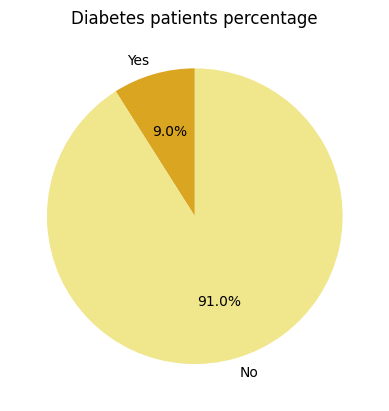

In [ ]:
plt.pie([yes, no], labels=["Yes", "No"],
        colors=["goldenrod", "khaki"],
        startangle=90, autopct='%1.1f%%')
plt.title("Diabetes patients percentage")
plt.show()

In [ ]:
yes_s = clean_df["Smoking"].value_counts()["Yes"]
no_s = clean_df["Smoking"].value_counts()["No"]

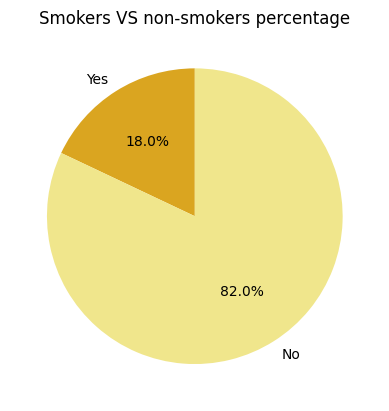

In [ ]:
plt.pie([yes_s, no_s], labels=["Yes", "No"],
        colors=["goldenrod", "khaki"],
        startangle=90, autopct='%1.1f%%')
plt.title("Smokers VS non-smokers percentage")
plt.show()

Number of somkers by males and females

In [ ]:
smokersByGender = clean_df.groupby("Gender")["Smoking"].value_counts()

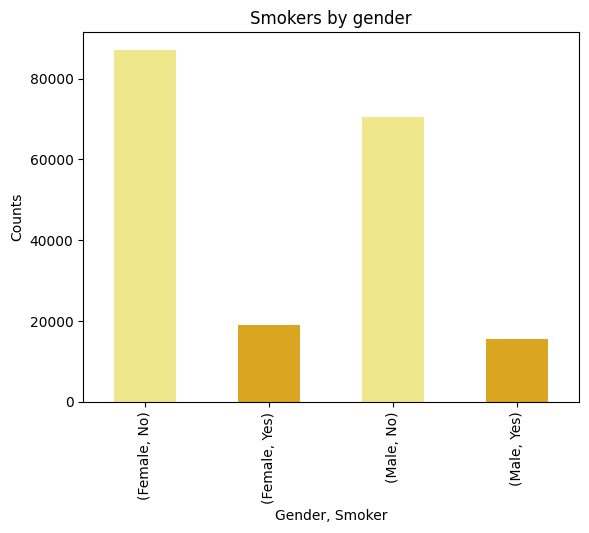

In [ ]:
smokersByGender.plot(
    kind="bar",
    xlabel="Gender, Smoker",
    ylabel="Counts",
    title="Smokers by gender",
    color=["khaki", "goldenrod", "khaki", "goldenrod"]
);

Diabetes patients in males and females

In [ ]:
DiabetesByGender = clean_df.groupby("Gender")["Diabetes"].value_counts()

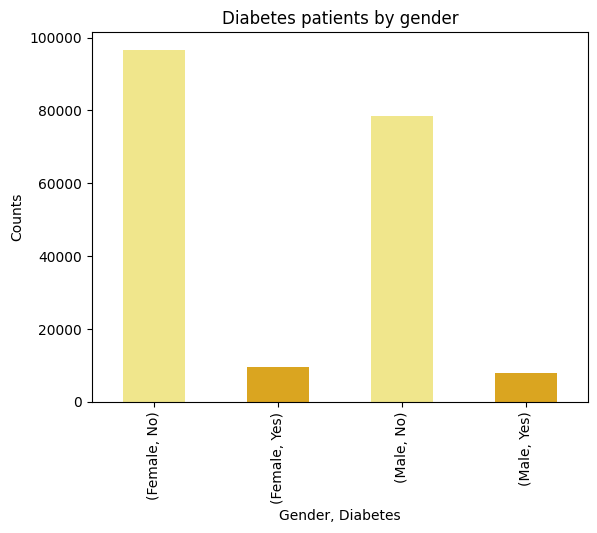

In [ ]:
DiabetesByGender.plot(
    kind="bar",
    xlabel="Gender, Diabetes",
    ylabel="Counts",
    title="Diabetes patients by gender",
    color=["khaki", "goldenrod", "khaki", "goldenrod"]
);

In [ ]:
qntl10 = clean_df["Cholesterol"].quantile(0.1)
qntl90 = clean_df["Cholesterol"].quantile(0.9)
mask = clean_df['Cholesterol'].between(qntl10, qntl90)
new_df = clean_df[mask]

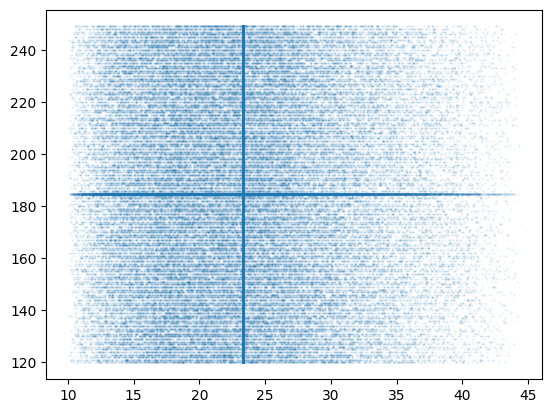

In [ ]:
plt.scatter(df0["BMI"], df0["Cholesterol"], s=0.5, alpha=0.05)

plt.show()

# df0["Blood Pressure"].plot(kind="hist", xlabel="Cholesterol")

In [ ]:
matrix = clean_df[["Age", "Height", "Weight", "BMI", "Temperature", "Heart Rate", "Blood Pressure", "Cholesterol"]].corr()
matrix

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
Age,1.000000,0.001718,0.004696,0.002839,0.003242,0.004371,-0.002935,-0.000234
Height,0.001718,1.000000,-0.000093,-0.494160,-0.003789,0.005478,0.003017,0.000828
Weight,0.004696,-0.000093,1.000000,0.735666,0.001825,0.001027,0.002050,-0.001232
BMI,0.002839,-0.494160,0.735666,1.000000,0.001941,-0.001207,0.000274,-0.002357
Temperature,0.003242,-0.003789,0.001825,0.001941,1.000000,-0.002791,-0.002804,-0.000766
Heart Rate,0.004371,0.005478,0.001027,-0.001207,-0.002791,1.000000,0.001826,0.004146
Blood Pressure,-0.002935,0.003017,0.002050,0.000274,-0.002804,0.001826,1.000000,0.003037
Cholesterol,-0.000234,0.000828,-0.001232,-0.002357,-0.000766,0.004146,0.003037,1.000000


In [ ]:
!pip install imbalanced-learn

In [ ]:
X = clean_df[["Age", "BMI", "Temperature", "Heart Rate", "Blood Pressure", "Cholesterol"]]
y = clean_df["Diabetes"]

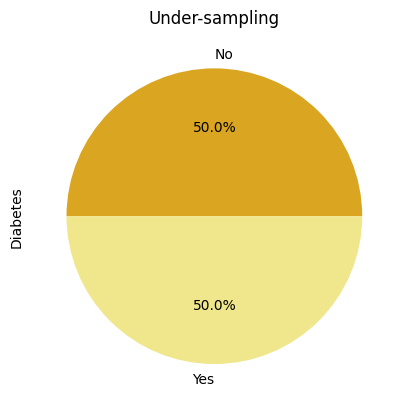

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # the 1 means the 2 classes wil be the same size 0.5+0.5
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%1.1f%%', colors=["goldenrod", "khaki"])
_ = ax.set_title("Under-sampling")

In [ ]:
y_res.value_counts()

No     17286
Yes    17286
Name: Diabetes, dtype: int64

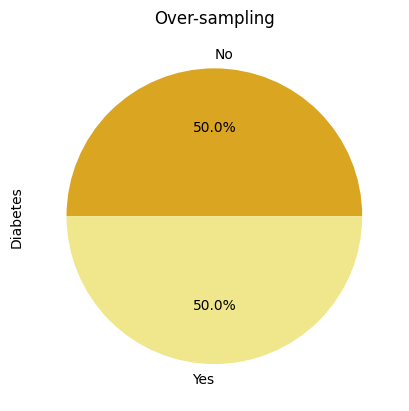

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy='not majority') # the 1 means the 2 classes wil be the same size 0.5+0.5
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%1.1f%%', colors=["goldenrod", "khaki"])
_ = ax.set_title("Over-sampling")

In [ ]:
y_res.value_counts()

No     175070
Yes    175070
Name: Diabetes, dtype: int64

In [ ]:
for i in range(0, len(y_res)):
  if y_res[i] == 'No':
    y_res[i] = 0
  else:
    y_res[i] = 1

In [ ]:
y_res.value_counts()

0    17286
1    17286
Name: Diabetes, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_res, y_res, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
rf_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, rf_preds))

0.4473205530119796
